In [87]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import ceil

In [88]:
csq = pd.read_csv('csq.gz', sep = " ", header= None)
samples= pd.read_csv('samples.gz', sep = " ", header= None)
csq = csq.values
samples = samples.values

In [89]:
m_true = np.array([1E4, 1E5, 1.7, 0.1])
m_0 = [10**(3.9), 10**(5.2), 1.5, 0.3]

nstep= 10000
csq_start = 123879376900.95654
param_length = np.shape(samples)[1]

In [90]:
def mcmc(start_guess, samples, csq, csq_start, nstep):

    #definig the chain
    chain = np.empty((nstep, len(start_guess)))
    chain[0, :] = start_guess
     
    #defining the chi-square array
    chisq = np.zeros(nstep)
    chisq[0] = csq_start

    #defining the acceptance ratio
    acceptance_ratio = 0
            
    #the chain 
    for i in range(1, nstep):
        new_param = samples[i, :]
        new_chisq =  csq[i]      
        if new_chisq <= chisq[i-1]:
            acceptance_ratio = acceptance_ratio + 1
            chisq[i] = new_chisq
            chain[i, :] = new_param 
        else :
            betta = 1
            if np.random.rand(1)<betta*(np.exp(-0.5*(new_chisq-chisq[i-1]))):
                acceptance_ratio = acceptance_ratio + 1
                chisq[i] = new_chisq
                chain[i, :] = new_param
            else:
                chisq[i] = chisq[i-1]
                chain[i, :] = chain[i-1, :]          
    return chain, chisq, acceptance_ratio/nstep

In [91]:
params, cs, acceptance_ratio = mcmc(m_0, samples, csq, csq_start, nstep)

In [92]:
mcmc_param= np.empty(param_length)
for i in range(param_length):
    mcmc_param[i] = np.mean(params[:,i]) #array of best parameters  

In [93]:
mcmc_param

array([9.99980357e+03, 1.00004972e+05, 1.69995845e+00, 1.00019996e-01])

In [94]:
print('True Parameters: ' + repr(m_true))
print('Starting Parameters: ' + repr(m_0))
print('MCMC Fitted Parameters: ' + repr(mcmc_param))
print("Chi-squared of original guess:"+ repr(cs[0]))
print("Chi-squared of MCMC result:"+ repr(2996.786984538737))
print("acceptance_ratio for %d Steps: " %nstep + repr(acceptance_ratio*100) +"%")

True Parameters: array([1.0e+04, 1.0e+05, 1.7e+00, 1.0e-01])
Starting Parameters: [7943.282347242814, 158489.3192461114, 1.5, 0.3]
MCMC Fitted Parameters: array([9.99980357e+03, 1.00004972e+05, 1.69995845e+00, 1.00019996e-01])
Chi-squared of original guess:123879376900.95654
Chi-squared of MCMC result:2996.786984538737
acceptance_ratio for 10000 Steps: 22.66%


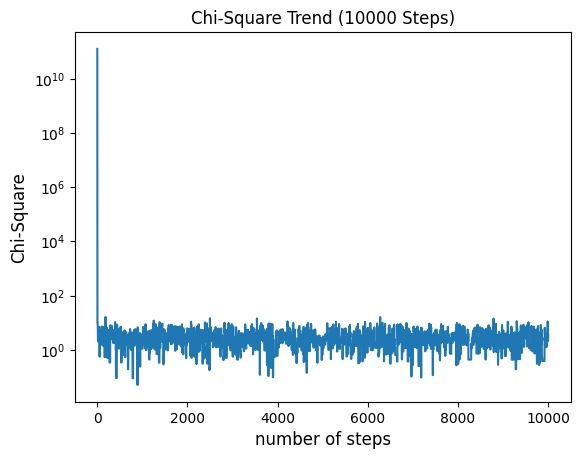

In [95]:
plt.semilogy(cs)
plt.xlabel('number of steps', fontsize=12)
plt.title ('Chi-Square Trend (%d Steps)'%nstep, fontsize=12)
plt.ylabel('Chi-Square', fontsize=12)
plt.show()

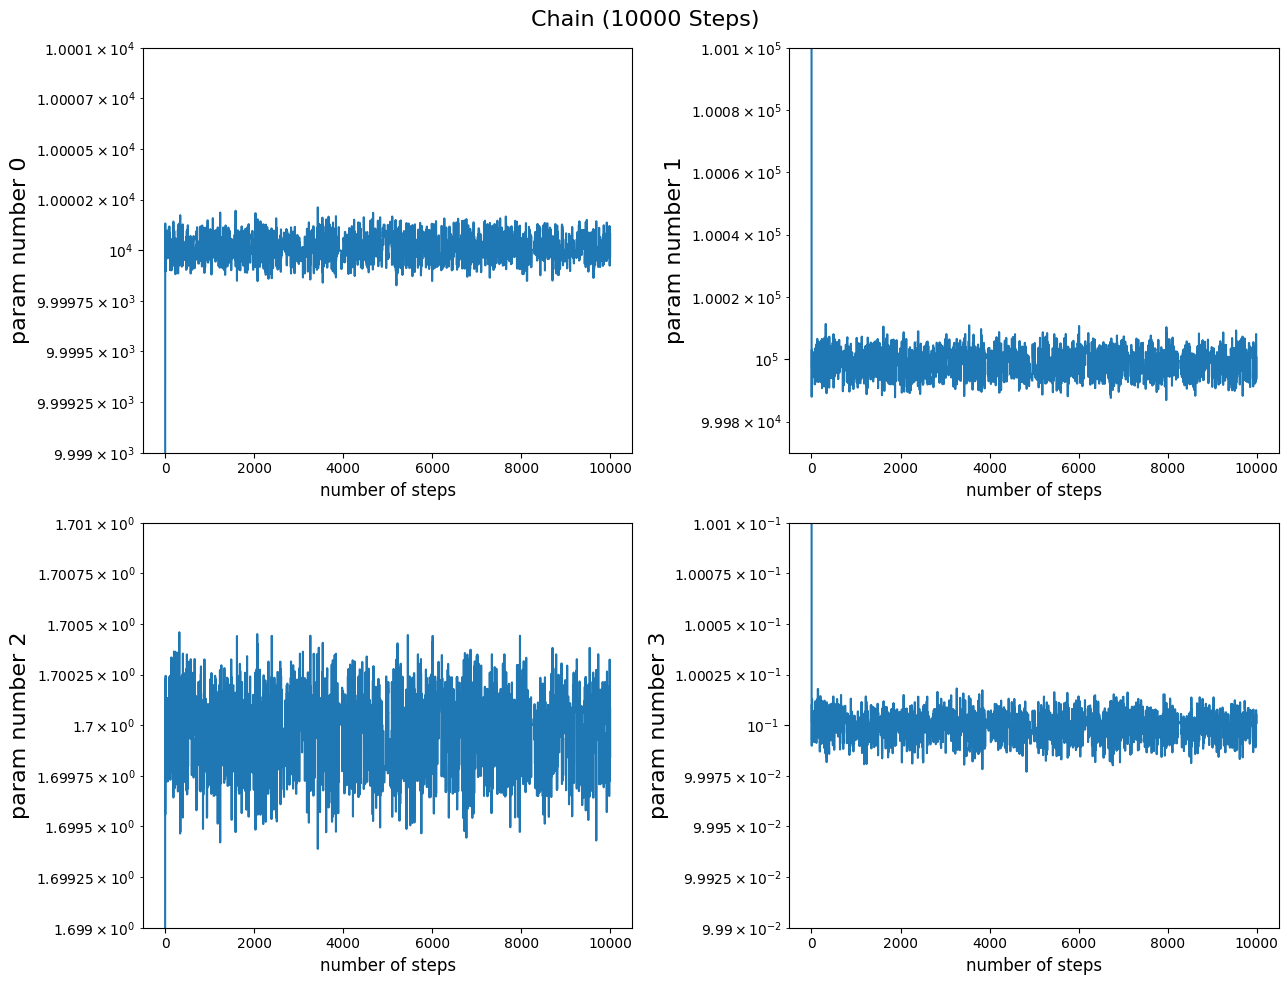

In [115]:
fig3, ax_list = plt.subplots(2, 2, figsize=(13,10))
fig3.suptitle('Chain (%d Steps)'%nstep, fontsize=16)
ax_list[0, 0].semilogy(params[:,0])
ax_list[0, 0].set_ylim(bottom=9.999E3, top=1.0001E4)
ax_list[0, 0].set_ylabel('param number 0', fontsize=16)
ax_list[0, 0].set_xlabel('number of steps', fontsize=12)

ax_list[0, 1].semilogy(params[:,1])
ax_list[0, 1].set_ylim(bottom= 9.997E4, top=1.001E5)
ax_list[0, 1].set_ylabel('param number 1', fontsize=16)
ax_list[0, 1].set_xlabel('number of steps', fontsize=12)

ax_list[1, 0].semilogy(params[:,2])
ax_list[1, 0].set_ylim(bottom=1.699, top=1.701)
ax_list[1, 0].set_ylabel('param number 2', fontsize=16)
ax_list[1, 0].set_xlabel('number of steps', fontsize=12)

ax_list[1, 1].semilogy(params[:,3])
ax_list[1, 1].set_ylim(bottom=9.99E-2, top= 1.001E-1)
ax_list[1, 1].set_ylabel('param number 3', fontsize=16)
ax_list[1, 1].set_xlabel('number of steps', fontsize=12)
plt.tight_layout()
plt.show()


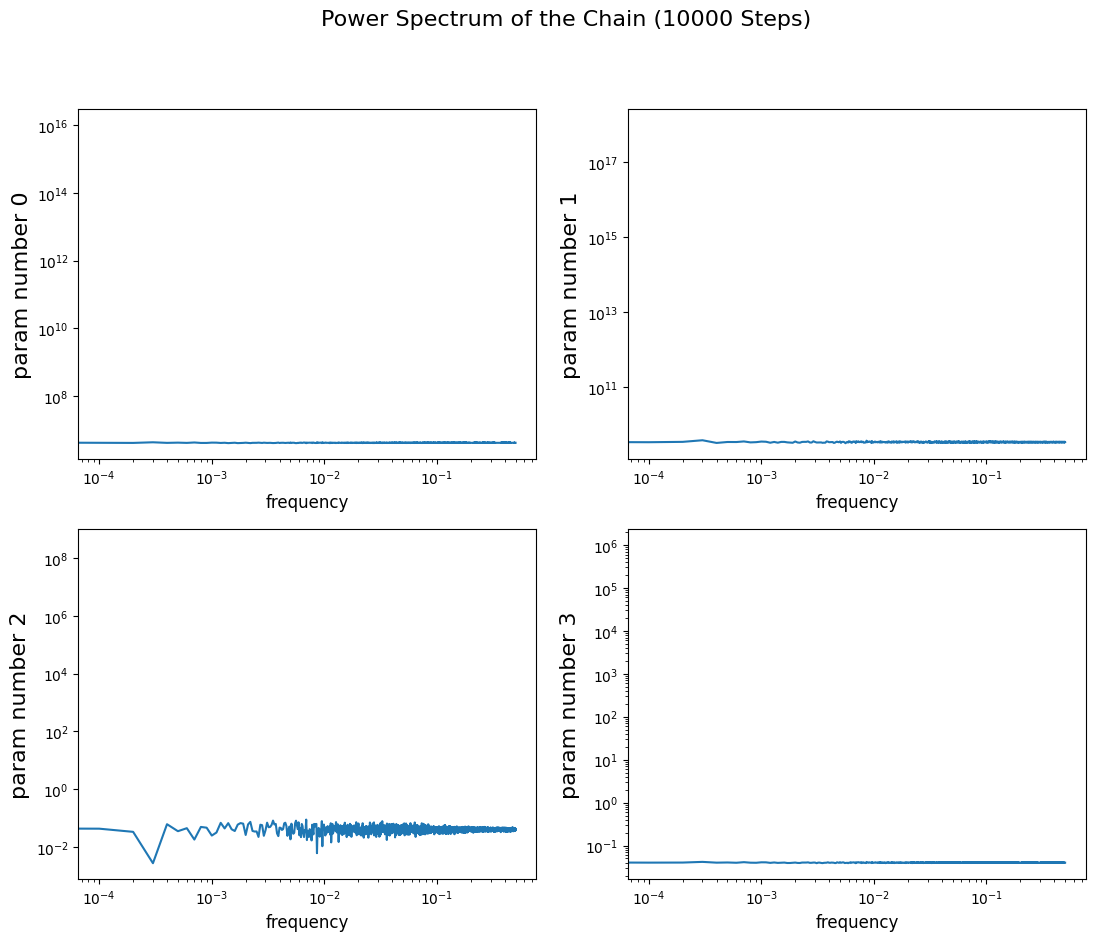

In [98]:
#Fourier Transform
ps = np.zeros((nstep, param_length))
for i in range(param_length):
    ps[:, i] = np.abs(np.fft.fft(params[:, i]))**2
    
freqs = np.fft.rfftfreq(nstep)
idx = np.argsort(freqs)

# %%
fig4, ax_list = plt.subplots(ceil(param_length/2), 2, figsize=(13,10))
fig4.suptitle('Power Spectrum of the Chain (%d Steps)'%nstep, fontsize=16)
if((param_length % 2) == 0):
    for i in range(ceil(param_length/2)):
        for j in range(2):
            ax_list[i, j].loglog(freqs[idx], ps[idx, i*2+ j])
            #plt.yscale("log")
            #ax_list[i, j].set_ylabel(repr(key[i*2+ j]), fontsize=16)
            ax_list[i, j].set_ylabel('param number %d'%(i*2+ j), fontsize=16)
            ax_list[i, j].set_xlabel('frequency', fontsize=12)
            #ax_list[i, j].set_ylim(0, 1E2)
            #ax_list[i, j].set_xlim(0.2, 0.5)

else:
    for i in range(ceil(param_length/2)):
        for j in range(2):
            if(j == 1 and i == (ceil(param_length/2)-1)):
                break
            ax_list[i, j].loglog(freqs[idx], ps[idx, i*2+ j])
            #plt.yscale("log")
            ax_list[i, j].set_ylabel('param number %d'%(i*2+ j), fontsize=16)
            ax_list[i, j].set_xlabel('frequency', fontsize=12)
            #ax_list[i, j].set_ylim(0, 1E2)
            #ax_list[i, j].set_xlim(0.2, 0.5)


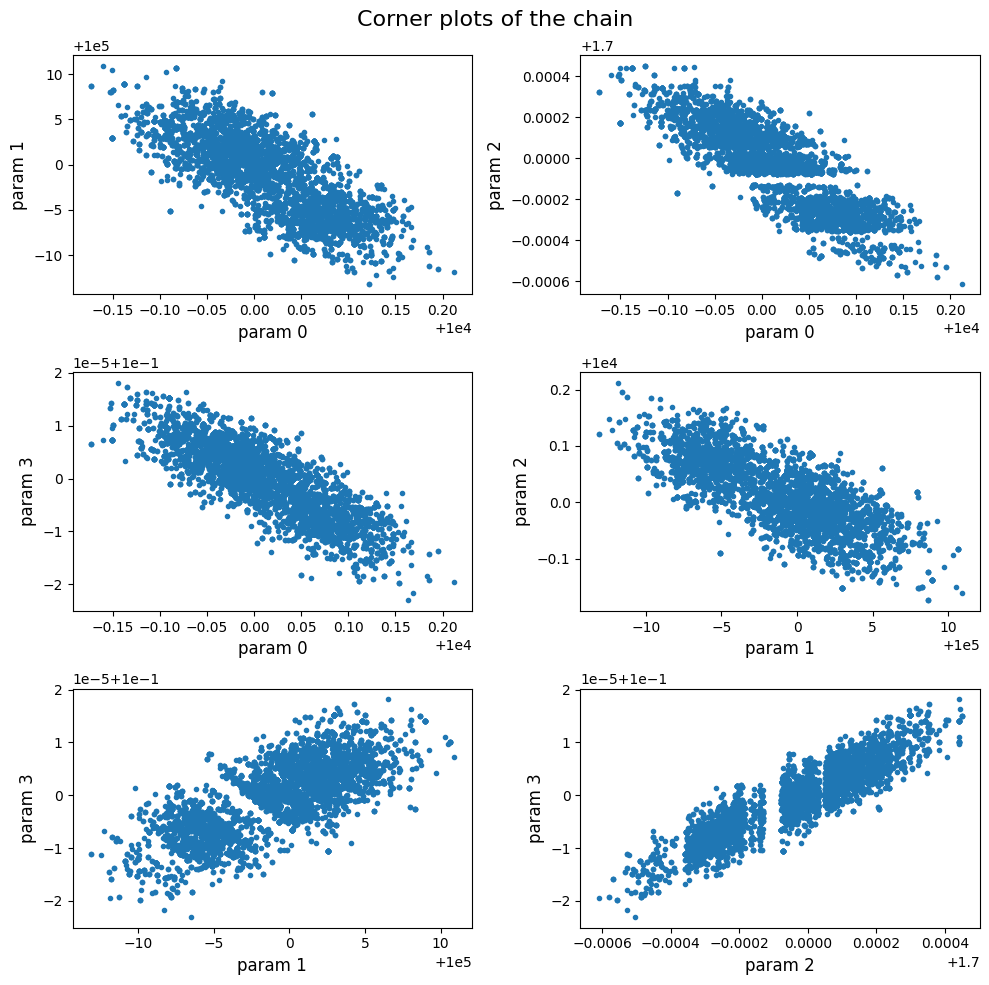

In [99]:
params_cut = params[1000:, :]
#params_cut = np.copy(params)
fig5, ax_list = plt.subplots(3, 2, figsize=(10,10))
fig5.suptitle('Corner plots of the chain', fontsize=16)

ax_list[0, 0].plot(params_cut[:, 0], params_cut[:, 1], linestyle = "", marker=".")
ax_list[0, 0].set_ylabel('param 1', fontsize=12)
ax_list[0, 0].set_xlabel('param 0', fontsize=12)

ax_list[0, 1].plot(params_cut[:, 0], params_cut[:, 2], linestyle = "", marker=".")
ax_list[0, 1].set_ylabel('param 2', fontsize=12)
ax_list[0, 1].set_xlabel('param 0', fontsize=12)
    
ax_list[1, 0].plot(params_cut[:, 0], params_cut[:, 3], linestyle = "", marker=".")
ax_list[1, 0].set_ylabel('param 3', fontsize=12)
ax_list[1, 0].set_xlabel('param 0', fontsize=12)

ax_list[1, 1].plot(params_cut[:, 1], params_cut[:, 0], linestyle = "", marker=".")
ax_list[1, 1].set_ylabel('param 2', fontsize=12)
ax_list[1, 1].set_xlabel('param 1', fontsize=12)

ax_list[2, 0].plot(params_cut[:, 1], params_cut[:, 3], linestyle = "", marker=".")
ax_list[2, 0].set_ylabel('param 3', fontsize=12)
ax_list[2, 0].set_xlabel('param 1', fontsize=12)

ax_list[2, 1].plot(params_cut[:, 2], params_cut[:, 3], linestyle = "", marker=".")
ax_list[2, 1].set_ylabel('param 3', fontsize=12)
ax_list[2, 1].set_xlabel('param 2', fontsize=12)

plt.tight_layout()
plt.show()